In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
from datetime import datetime
warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] =12
matplotlib.rcParams['text.color'] = 'k'

# Load specific forecasting tools
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

In [87]:
path_to_data = 'https://raw.githubusercontent.com/esnet/daphne/master/Multivariate-TimeSeries/One_year_data_sarima/one_year_data_34links.csv?token=AKKJU5VWABZUG4W3ZCPPIGS5N2JEU'

In [88]:
df = pd.read_csv(path_to_data)

In [89]:
df.head()

,Days,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L25,L26,L27,L28,L29,L30,L31,L32,L33,L34
0,01/01/2018 08:00,2.016730e+09,6.559878e+09,1.117868e+07,220096758.3,1.276634e+10,9.838906e+09,6.804753e+07,1.567461e+07,1.554591e+09,...,1.569704e+09,2.987887e+09,3.926408e+09,6.210077e+09,1.109243e+09,8.683116e+09,2.952571e+10,32127050406,9.575782e+08,7.241651e+09
1,01/01/2018 09:00,1.871437e+09,4.165667e+09,7.070847e+06,224528257.8,1.182706e+10,9.088112e+09,1.197467e+08,2.550747e+06,1.657738e+09,...,1.670443e+09,2.786660e+09,2.726693e+09,5.627768e+09,1.242256e+09,5.181239e+09,2.323105e+10,30542821342,1.846840e+09,3.695484e+09
2,01/01/2018 10:00,1.991793e+09,2.589278e+09,5.132826e+07,229200120.9,1.091153e+10,7.944180e+09,6.460113e+07,2.678000e+06,1.306412e+09,...,1.468039e+09,2.165914e+09,4.623652e+09,6.190882e+09,2.006322e+09,1.224286e+10,3.053876e+10,27252911164,1.947976e+09,5.325143e+09
3,01/01/2018 11:00,1.924070e+09,3.532163e+09,5.217827e+06,212289872.7,9.910009e+09,7.610080e+09,6.362367e+07,2.251643e+06,5.299254e+08,...,1.406788e+09,2.053214e+09,2.483065e+09,2.286046e+09,1.073181e+09,4.717642e+09,2.570215e+10,28311807743,2.217494e+09,2.194284e+09
4,01/01/2018 12:00,1.814329e+09,2.058993e+09,7.495363e+06,213758038.0,8.953243e+09,8.567451e+09,6.662926e+07,3.117066e+07,1.121435e+09,...,2.328494e+09,2.735493e+09,1.020563e+09,2.556964e+09,8.645069e+08,1.987249e+09,2.445649e+10,19851990236,1.115394e+09,3.096373e+09


In [90]:
df.tail()

,Days,L1,L2,L3,L4,L5,L6,L7,L8,L9,...,L25,L26,L27,L28,L29,L30,L31,L32,L33,L34
8755,01/01/2019 03:00,2.402730e+09,1.309966e+09,11633975.46,8.581576e+06,4.038911e+09,1.002571e+10,6.993650e+07,5.018029e+06,2.995564e+09,...,5.371283e+09,8.002203e+09,1.678710e+09,1.779878e+09,8.216592e+09,1.205433e+10,9.477344e+09,21147377690,1.287002e+10,2.905728e+10
8756,01/01/2019 04:00,2.009586e+09,1.117921e+09,9186894.13,1.115787e+07,7.387571e+09,1.329263e+10,6.710243e+07,2.681301e+07,2.946367e+09,...,4.954146e+09,1.079077e+10,1.510588e+09,3.190887e+09,8.529913e+09,9.295886e+09,7.918934e+09,32875422707,1.301031e+10,1.654098e+10
8757,01/01/2019 05:00,1.832082e+09,1.298531e+09,55891811.65,1.253225e+07,7.033060e+09,1.871115e+10,1.166133e+08,3.665524e+06,2.616579e+09,...,4.793232e+09,1.356316e+10,1.635087e+09,2.067932e+09,8.250299e+09,1.086424e+10,1.056289e+10,29075104551,1.348324e+10,2.205546e+10
8758,01/01/2019 06:00,1.708588e+09,1.271127e+09,61523060.49,1.950793e+07,6.566493e+09,1.769199e+10,6.396848e+07,7.373359e+07,3.523828e+09,...,6.408461e+09,8.298905e+09,3.304998e+09,2.178366e+09,9.627317e+09,1.006649e+10,8.537871e+09,35074429908,1.067890e+10,1.630523e+10
8759,01/01/2019 07:00,2.213860e+09,1.297482e+09,10973382.24,1.604493e+07,8.459405e+09,1.831548e+10,6.546813e+07,3.907766e+06,2.872310e+09,...,4.870591e+09,8.462884e+09,4.151781e+09,3.431256e+09,1.228012e+10,9.908178e+09,8.537895e+09,28794022741,9.330385e+09,1.814118e+10


In [91]:
df = df.dropna()

In [92]:
df.shape

(8760, 35)

In [93]:
df.isnull().sum()

Days    0
L1      0
L2      0
L3      0
L4      0
L5      0
L6      0
L7      0
L8      0
L9      0
L10     0
L11     0
L12     0
L13     0
L14     0
L15     0
L16     0
L17     0
L18     0
L19     0
L20     0
L21     0
L22     0
L23     0
L24     0
L25     0
L26     0
L27     0
L28     0
L29     0
L30     0
L31     0
L32     0
L33     0
L34     0
dtype: int64

In [94]:
df.dtypes

Days     object
L1      float64
L2      float64
L3      float64
L4      float64
L5      float64
L6      float64
L7      float64
L8      float64
L9      float64
L10     float64
L11       int64
L12       int64
L13     float64
L14     float64
L15     float64
L16     float64
L17     float64
L18     float64
L19     float64
L20     float64
L21     float64
L22     float64
L23     float64
L24     float64
L25     float64
L26     float64
L27     float64
L28     float64
L29     float64
L30     float64
L31     float64
L32       int64
L33     float64
L34     float64
dtype: object

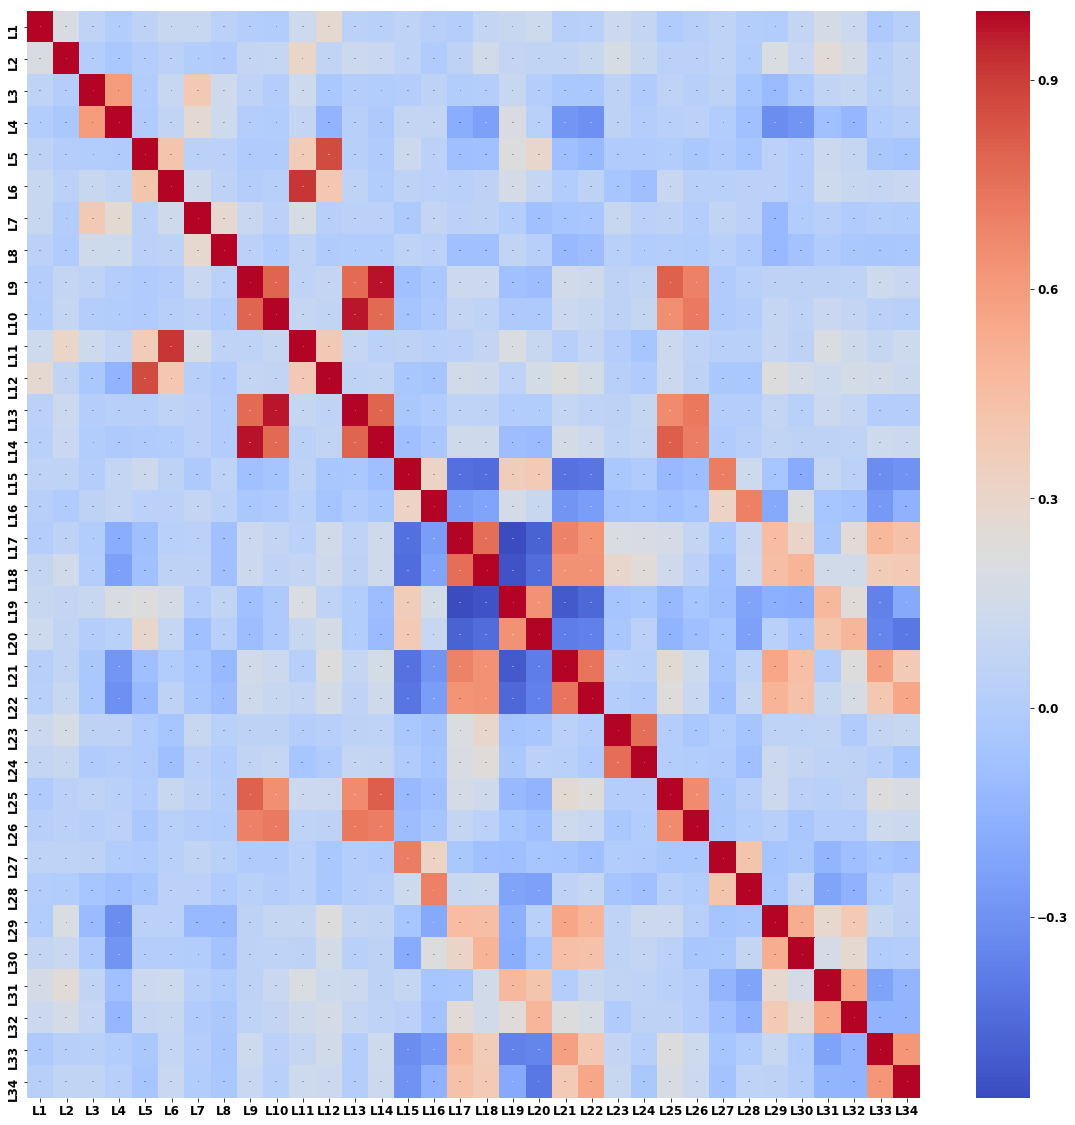

In [96]:
corr = df.corr().round(2)
plt.figure(figsize = (20,20))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({'font.size': 0})
plt.savefig('corr_plot.png')

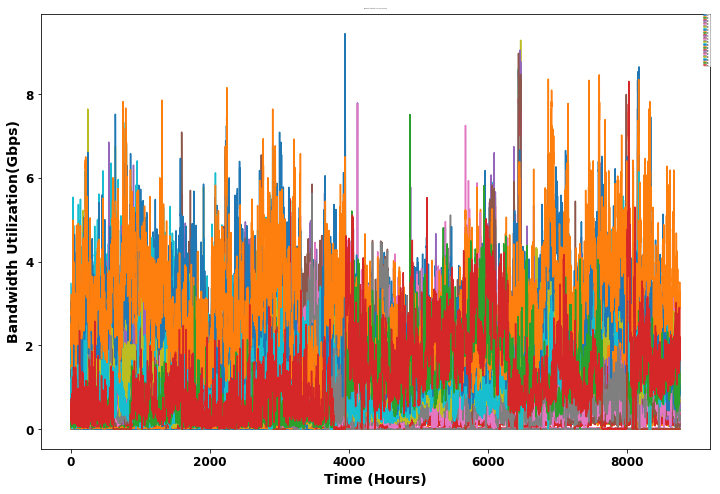

In [74]:
df.plot(figsize=(12,8))
plt.xlabel('Time (Hours)')
plt.ylabel('Bandwidth Utilization(Gbps)')
plt.title('Bandwidth Utitilization Over Time (3-Months)')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.show()

In [135]:
df['Days'] = pd.to_datetime(df['Days'],infer_datetime_format=True)

In [136]:
df = df.set_index('Days')

In [137]:
df.head()

,L1,L2,L11,L12,L15,L16,L27,L28
Days,,,,,,,,
2018-10-16 00:00:00,298.226302,364.417400,3038.660263,2532.918323,536.574543,352.284417,543.544807,347.829680
2018-10-16 01:00:00,237.435717,462.249266,2841.640786,2558.222984,655.191983,267.899977,660.252326,275.334507
2018-10-16 02:00:00,204.150128,641.944413,2935.303315,2273.447047,760.963512,171.900088,760.556908,168.474651
2018-10-16 03:00:00,142.584069,339.714029,3158.510908,1602.350766,883.944343,145.781491,889.167762,143.830323
2018-10-16 04:00:00,429.305359,493.692483,2718.553242,2090.785477,1182.477018,276.865026,1177.313635,271.596804


In [138]:
df.columns

Index(['L1', 'L2', 'L11', 'L12', 'L15', 'L16', 'L27', 'L28'], dtype='object')

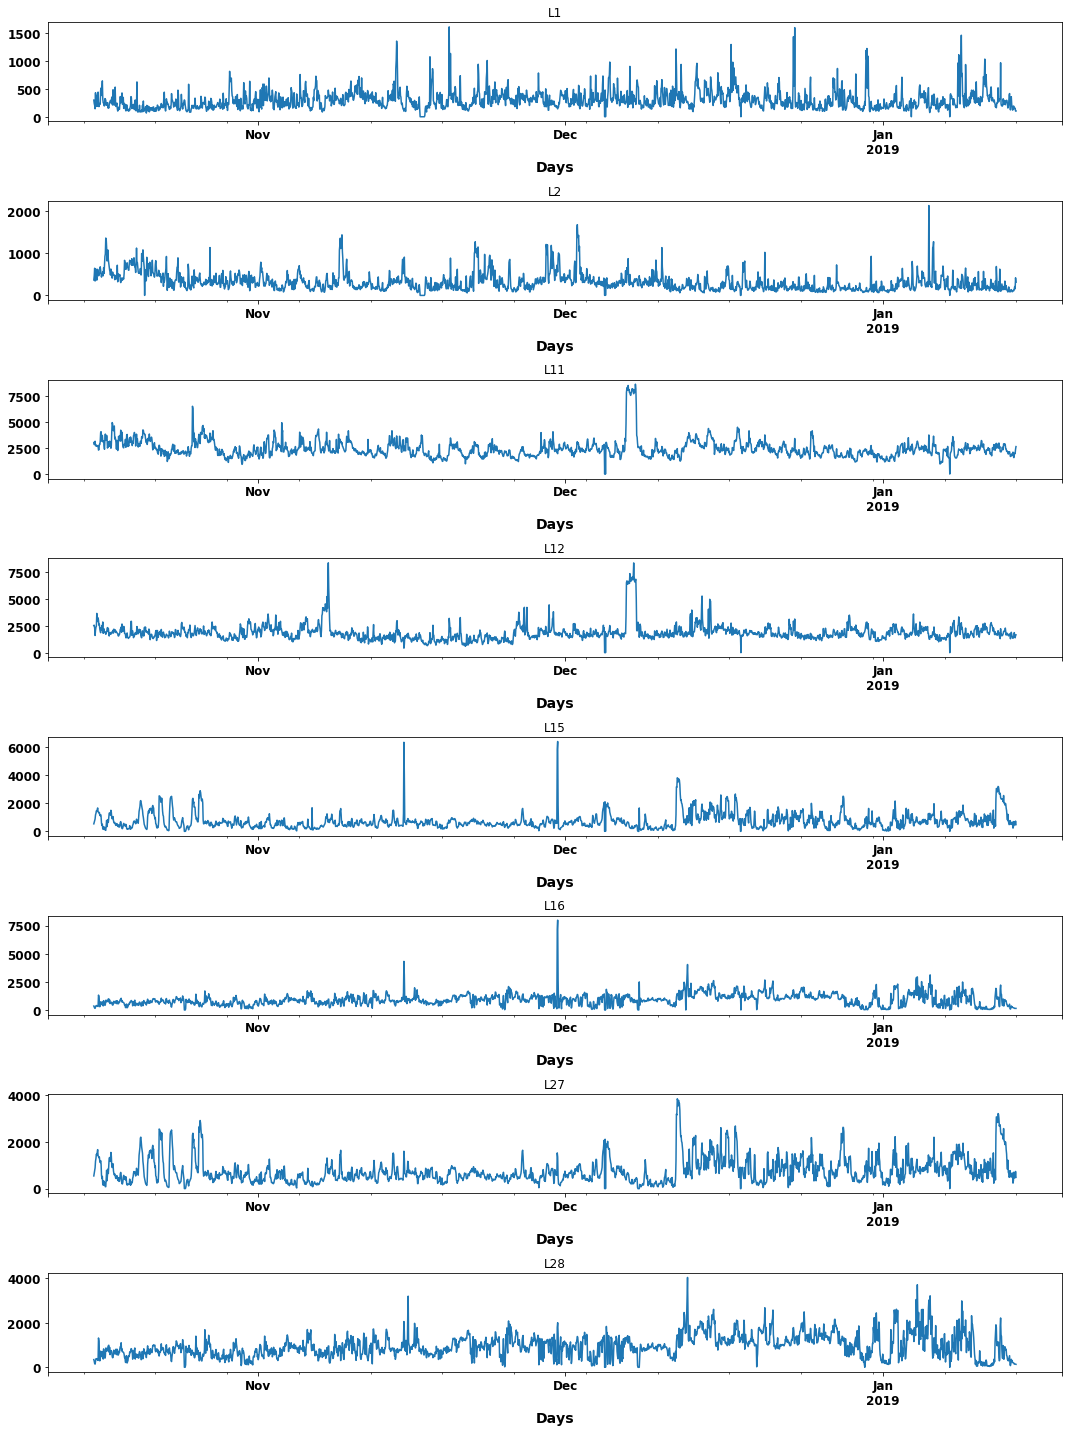

In [139]:
fig,ax = plt.subplots(8,1,figsize=(15,20))
for i,column in enumerate([col for col in df.columns]):
    df[column].plot(ax=ax[i])
    ax[i].set_title(column)
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    plt.tight_layout()
    

In [140]:
#Test for Stationarity
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [141]:

#define function for kpss test
#from statsmodels.tsa.stattools import kpss
#define KPSS
#def kpss_test(timeseries):
#    print ('Results of KPSS Test:')
#    kpsstest = kpss(timeseries, regression='c')
#    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
#    for key,value in kpsstest[3].items():
#    kpss_output ['Critical Value (%s)'%key] = value
#print(kpss_output)

In [142]:
df.describe()

,L1,L2,L11,L12,L15,L16,L27,L28
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,300.894316,316.863880,2442.091769,1865.537585,738.919893,920.065613,767.553863,956.006477
std,172.672024,219.218296,887.808821,791.184046,580.423990,538.947360,547.930819,513.670666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.643161,165.755116,1928.789002,1461.133498,391.907045,571.933594,410.417400,609.614343
50%,262.867213,263.161738,2294.664195,1741.691560,605.683871,881.449295,635.885157,899.417671
75%,365.734808,397.040283,2761.680607,2071.154058,892.235052,1193.446442,952.681415,1238.378671
max,1607.521043,2123.442236,8652.709244,8356.831145,6426.723947,7988.408914,3842.316691,4047.568218


In [143]:
adf_test(df['L1']), adf_test(df['L2']), adf_test(df['L11']), adf_test(df['L12']), adf_test(df['L15']), adf_test(df['L16']), adf_test(df['L27']), adf_test(df['L28'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.216065e+01
p-value                 1.496354e-22
# lags used             5.000000e+00
# observations          2.154000e+03
critical value (1%)    -3.433390e+00
critical value (5%)    -2.862883e+00
critical value (10%)   -2.567485e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: 
ADF test statistic     -7.120076e+00
p-value                 3.742335e-10
# lags used             1.000000e+01
# observations          2.149000e+03
critical value (1%)    -3.433397e+00
critical value (5%)    -2.862886e+00
critical value (10%)   -2.567486e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: 
ADF test statistic     -7.774523e+00
p-value                 8.741019e-12
# lags used             5.000000e+00
# observations          2.154000e+03
critical value (1%)

(None, None, None, None, None, None, None, None)

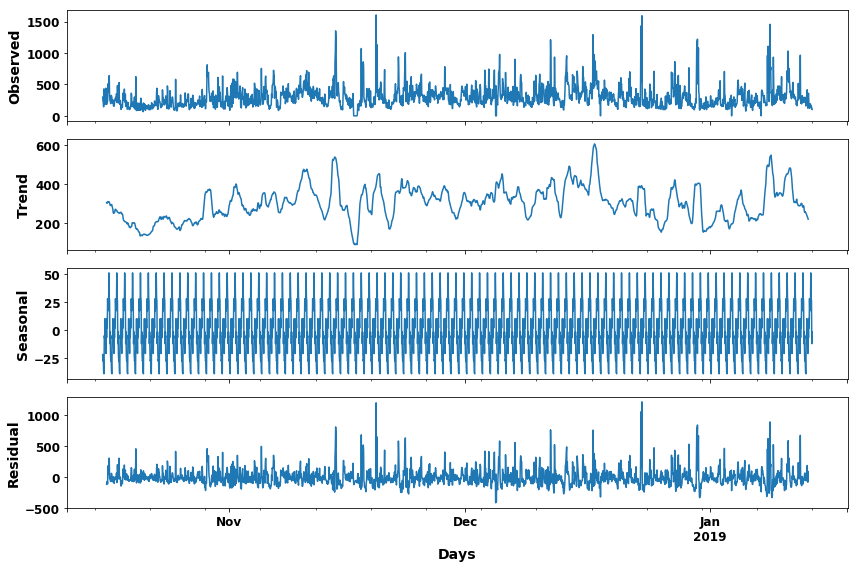

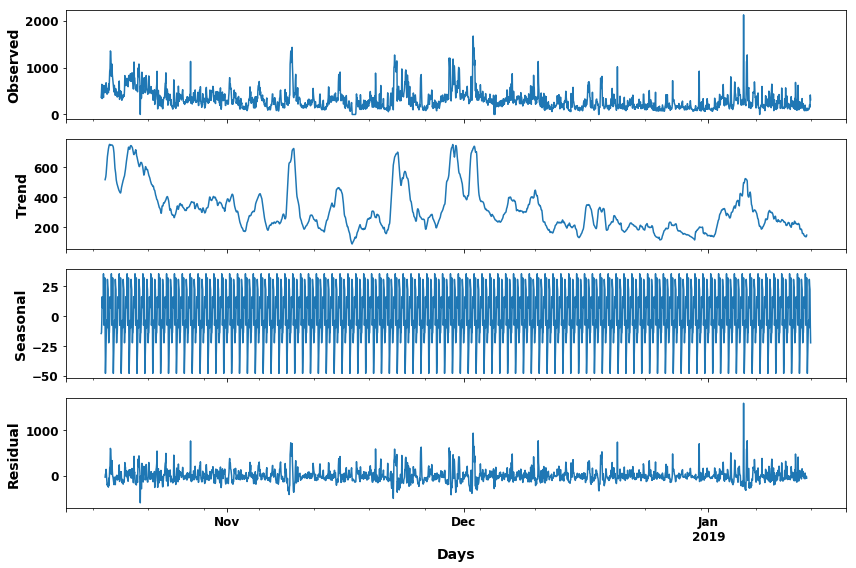

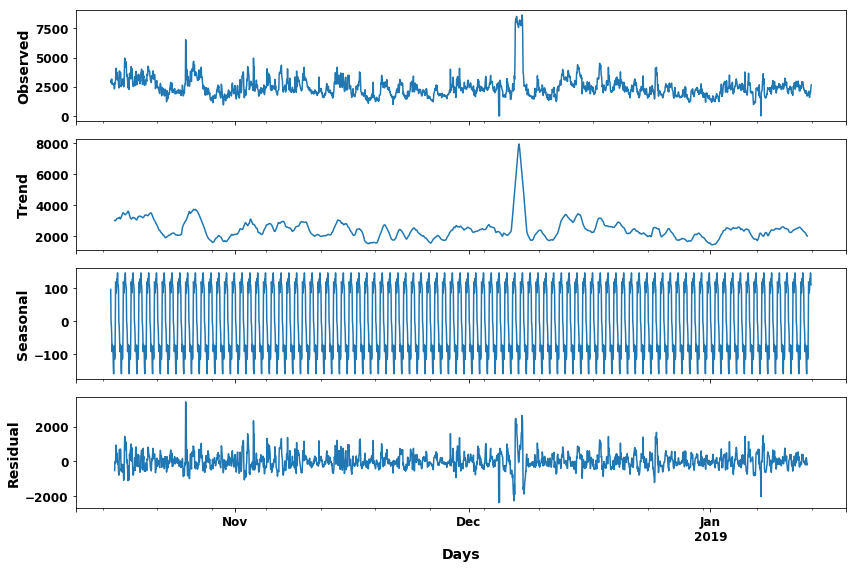

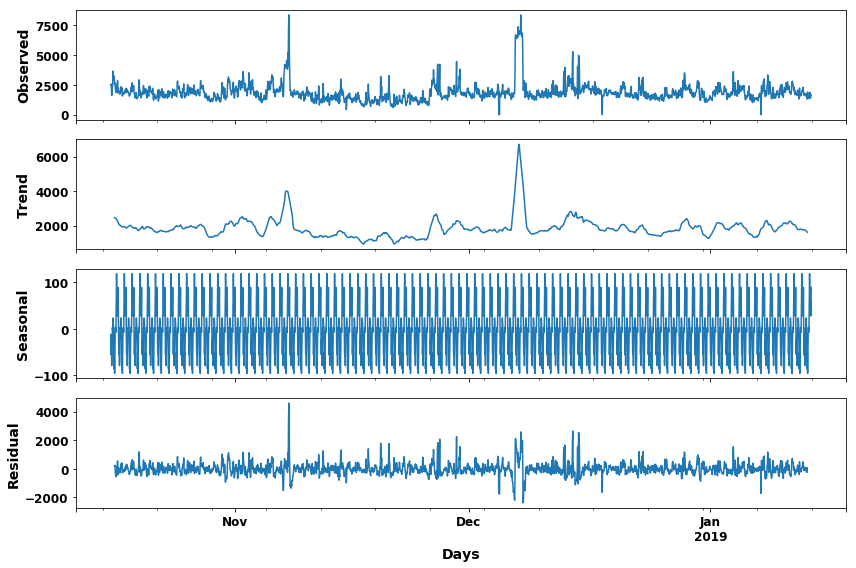

In [144]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['L1'], model='additive')
fig = decomposition.plot()
plt.show()

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['L2'], model='additive')
fig = decomposition.plot()
plt.show()

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['L11'], model='additive')
fig = decomposition.plot()
plt.show()

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df['L12'], model='additive')
fig = decomposition.plot()
plt.show()

In [145]:
df.shape

(2160, 8)

In [146]:
average_daily_speed = df.resample('D').mean()
average_daily_speed.dtypes

L1     float64
L2     float64
L11    float64
L12    float64
L15    float64
L16    float64
L27    float64
L28    float64
dtype: object

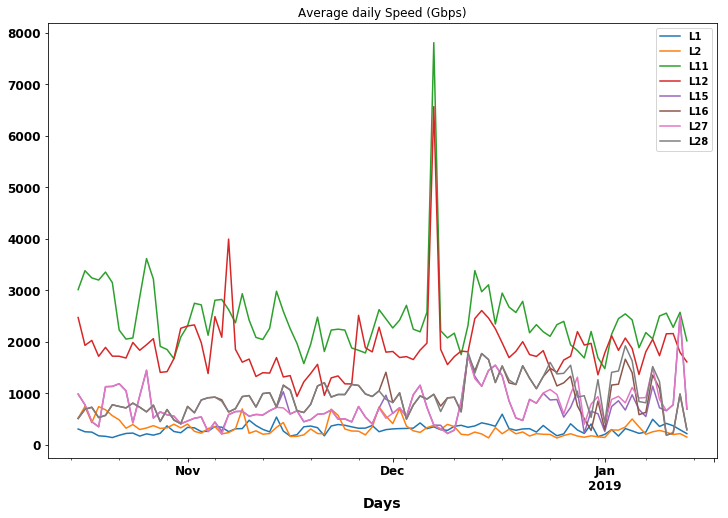

In [147]:
average_daily_speed.plot()
plt.title('Average daily Speed (Gbps)')
plt.show()

In [148]:
average_daily_speed.head()

,L1,L2,L11,L12,L15,L16,L27,L28
Days,,,,,,,,
2018-10-16,305.680875,514.791035,3013.926945,2472.171941,983.466206,510.744147,986.349372,508.411237
2018-10-17,252.073149,743.322979,3380.849163,1931.643888,774.496691,685.731817,780.462056,694.627261
2018-10-18,245.075514,429.285076,3241.028114,2026.484739,447.041309,727.220054,450.024672,728.478939
2018-10-19,173.349486,740.365177,3199.905246,1717.666923,347.056147,528.281840,349.142117,527.309612
2018-10-20,163.331534,678.833092,3354.574552,1891.115616,1126.900517,571.402285,1129.103535,568.583561


In [149]:
df_av = average_daily_speed

In [150]:
df_av.head()

,L1,L2,L11,L12,L15,L16,L27,L28
Days,,,,,,,,
2018-10-16,305.680875,514.791035,3013.926945,2472.171941,983.466206,510.744147,986.349372,508.411237
2018-10-17,252.073149,743.322979,3380.849163,1931.643888,774.496691,685.731817,780.462056,694.627261
2018-10-18,245.075514,429.285076,3241.028114,2026.484739,447.041309,727.220054,450.024672,728.478939
2018-10-19,173.349486,740.365177,3199.905246,1717.666923,347.056147,528.281840,349.142117,527.309612
2018-10-20,163.331534,678.833092,3354.574552,1891.115616,1126.900517,571.402285,1129.103535,568.583561


In [151]:
df_av.shape

(90, 8)

In [152]:
df.shape

(2160, 8)

In [153]:
# NUm of Observations
nobs = 24

In [154]:
#train = df_av[:-nobs] #Start=  begining of df--> -24 from the end

In [155]:
train = df[:-nobs] #Start=  begining of df--> -24 from the end

In [156]:
#testagg = df_av[-nobs:]# start -24 from the end of the DF ---> go to the end of DF

In [157]:
test = df[-nobs:]# start -24 from the end of the DF ---> go to the end of DF

In [158]:
print(train.shape)
print(test.shape)

(2136, 8)
(24, 8)


In [159]:
#test.index = test.index.normalize()

In [160]:
test.head()

,L1,L2,L11,L12,L15,L16,L27,L28
Days,,,,,,,,
2019-01-13 00:00:00,281.174432,232.542646,2412.573497,1636.022114,1667.205222,820.114350,1674.465796,817.857112
2019-01-13 01:00:00,295.955440,156.842061,2197.555377,1790.855631,1483.468232,529.169830,1487.553381,530.005454
2019-01-13 02:00:00,283.888503,117.385206,2160.468312,1803.412436,1065.880199,509.353709,1069.159130,511.832025
2019-01-13 03:00:00,211.178614,107.952375,2199.811688,1792.735229,817.702833,354.772761,829.195831,352.657729
2019-01-13 04:00:00,156.450927,80.082043,2114.521945,1624.760809,1220.500873,317.928293,1217.105797,323.577456


In [161]:
test.shape

(24, 8)

In [162]:
#testagg.shape

In [163]:
 #testagg.head()

In [164]:
model = VAR(train)

for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
 #print('BIC: ', results.bic)
    print()

Order = 1
AIC:  86.10907957529217

Order = 2
AIC:  86.0325788985571

Order = 3
AIC:  85.98969507442035

Order = 4
AIC:  85.98558070477023

Order = 5
AIC:  85.9928722130857

Order = 6
AIC:  86.01496053454055

Order = 7
AIC:  86.03255151660794

Order = 8
AIC:  86.05389825090991

Order = 9
AIC:  86.03273430105676

Order = 10
AIC:  86.05975512757941

Order = 11
AIC:  86.06948985299681

Order = 12
AIC:  86.10226480597451



In [165]:
#We find the Number of k (k= number of variables/links)
#We find the optimal number or order of P selected using the AIC
results = model.fit(5)  #p=5

In [166]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 27, Jun, 2019
Time:                     09:55:37
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    86.8647
Nobs:                     2131.00    HQIC:                   86.3120
Log likelihood:          -115487.    FPE:                2.21946e+37
AIC:                      85.9929    Det(Omega_mle):     1.90562e+37
--------------------------------------------------------------------
Results for equation L1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         95.152941        14.040823            6.777           0.000
L1.L1          0.502717         0.023922           21.015           0.000
L1.L2         -0.012314         0.023228           -0.530           0.596
L1.L11         0.

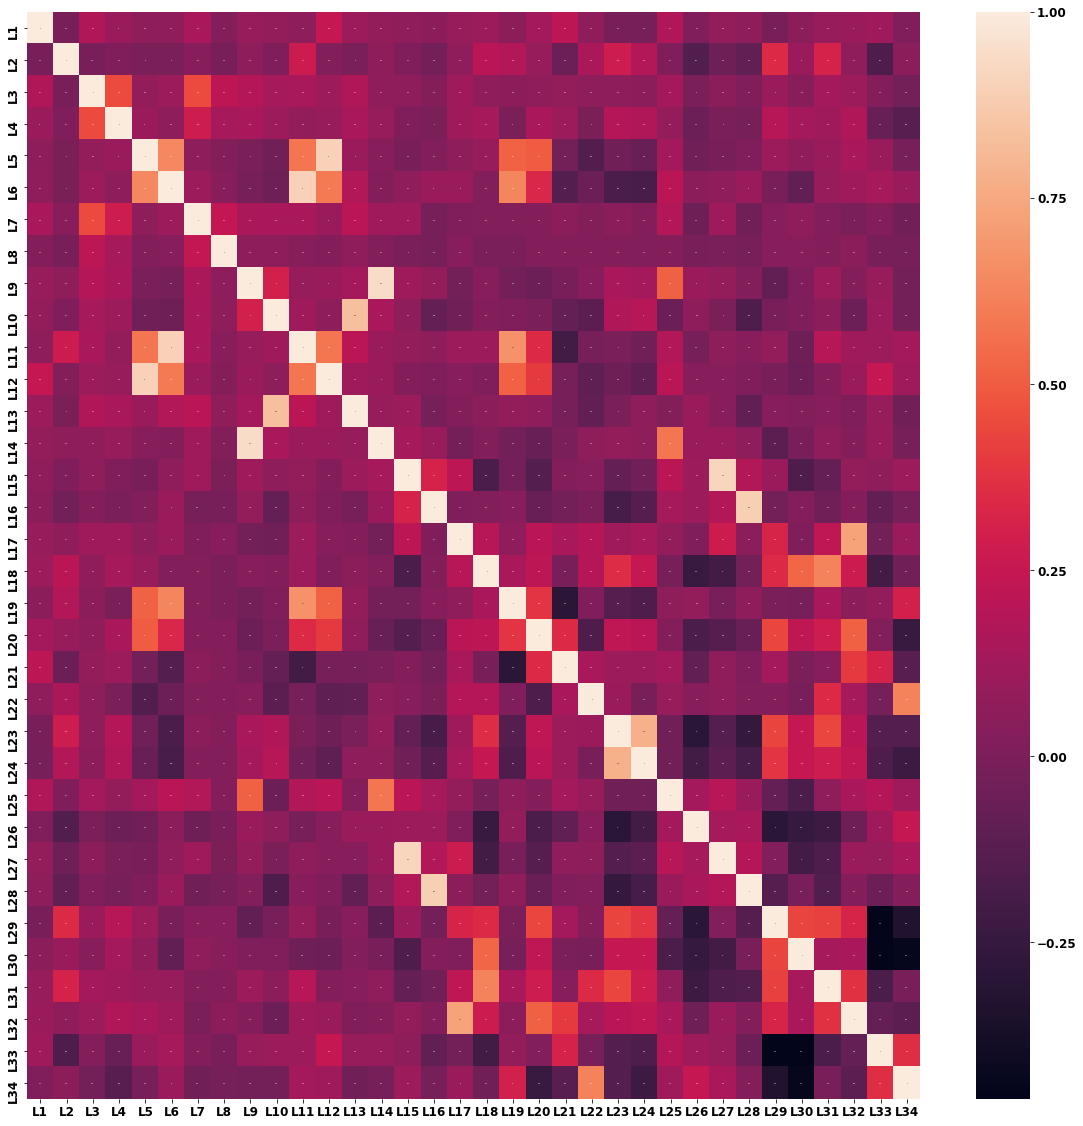

In [26]:
corr = df.corr().round(2)
plt.figure(figsize = (20,20))
sns.heatmap(corr, annot=True)
plt.savefig('site_corr.png')

In [123]:
#Lag order = 6, k = 8 (No of Links). steps= 24hrs into the futire
train.values[-5:].shape

(5, 8)

In [48]:
lagged_values = train.values[-5:]

In [49]:
lagged_values 

array([[ 259.8109574 ,  293.9192745 , 1544.790273  , 1725.187888  ,
         123.9875749 ,  171.187863  , 2041.012168  ,  368.3249473 ],
       [ 178.5628552 ,  317.9729949 , 1338.266726  , 1653.359532  ,
          92.19052644,  126.9759064 , 2030.079509  ,  796.0486194 ],
       [ 126.6352338 ,  301.6816088 , 1302.048976  , 1569.559238  ,
          82.98046177,  128.0364486 , 1885.19716   ,  927.8704324 ],
       [ 165.542111  ,  309.5396801 , 1405.316204  , 1526.557315  ,
          83.68588479,  114.2283975 , 2010.082885  ,  798.1904792 ],
       [ 155.2152497 ,  400.0921021 , 1269.347819  , 1473.678211  ,
         111.6953325 ,  116.2437259 , 1976.492328  ,  789.7508514 ]])

In [56]:
z = results.forecast(y=lagged_values,steps=24)

In [57]:
z

array([[ 164.41361924,  383.73313183, 1323.5399141 , 1462.76330685,
         110.89591703,  125.50413487, 1835.93502749,  817.13992803],
       [ 169.37807572,  360.71106508, 1352.399715  , 1527.69651311,
         108.24287082,  130.35063408, 1753.18536603,  876.46947112],
       [ 167.60570242,  356.66169787, 1378.71523341, 1569.77453174,
         105.017232  ,  132.16917606, 1642.88904537,  949.48953363],
       [ 174.11668351,  351.38719615, 1397.25904988, 1570.580575  ,
         106.05586557,  129.69263552, 1532.09581167,  948.30848423],
       [ 175.09840281,  350.71280826, 1391.67468129, 1569.6340946 ,
         105.3383483 ,  131.7475253 , 1445.37562378,  961.80734518],
       [ 176.78741221,  349.69256499, 1396.91739128, 1571.94345252,
         105.32478172,  133.59155448, 1369.09629377,  980.10473988],
       [ 180.28158778,  347.42452717, 1405.45278921, 1573.56967529,
         105.47607264,  135.29717441, 1302.24912123,  995.3180749 ],
       [ 182.10702003,  345.71358842, 140

In [58]:
test.tail()

,L1,L2,L3,L4,L5,L6,L7,L8
Days,,,,,,,,
2019-01-13 19:00:00,119.590209,218.709408,948.282200,1107.255585,97.151573,91.131893,475.274037,143.211147
2019-01-13 20:00:00,97.765101,208.164222,877.484034,1072.885087,81.116056,115.617786,458.203075,149.098428
2019-01-13 21:00:00,81.826164,215.351361,1593.645507,869.034227,89.724965,160.531366,485.701395,143.253542
2019-01-13 22:00:00,187.980324,323.162112,1248.875094,1260.192950,90.066610,122.153071,735.878701,145.124550
2019-01-13 23:00:00,203.064999,305.765805,1133.892601,948.649530,92.342601,143.393375,482.422127,135.015699


In [59]:
#df_av.columns
df.columns

Index(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8'], dtype='object')

In [60]:
idx = pd.date_range('2019-01-13', periods =24, freq='D')

In [61]:
idx

DatetimeIndex(['2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05'],
              dtype='datetime64[ns]', freq='D')

In [62]:

#Dataframe for forcast into the test set
#df_av_forecast = pd.DataFrame(data=z,index=idx,columns=['L1_forecast','L2_forecast'])
df_forecast = pd.DataFrame(data=z,index=idx,columns=['L1_forecast','L2_forecast','L3_forecast','L4_forecast','L5_forecast','L6_forecast','L7_forecast','L8_forecast'])

In [63]:
#df_forecast.index.name = 'Days'

In [64]:
df_forecast.head()

,L1_forecast,L2_forecast,L3_forecast,L4_forecast,L5_forecast,L6_forecast,L7_forecast,L8_forecast
2019-01-13,164.413619,383.733132,1323.539914,1462.763307,110.895917,125.504135,1835.935027,817.139928
2019-01-14,169.378076,360.711065,1352.399715,1527.696513,108.242871,130.350634,1753.185366,876.469471
2019-01-15,167.605702,356.661698,1378.715233,1569.774532,105.017232,132.169176,1642.889045,949.489534
2019-01-16,174.116684,351.387196,1397.259050,1570.580575,106.055866,129.692636,1532.095812,948.308484
2019-01-17,175.098403,350.712808,1391.674681,1569.634095,105.338348,131.747525,1445.375624,961.807345


In [65]:
df_forecast.to_csv('link_forecast')

In [66]:
df.shape

(2160, 8)

In [67]:
test_range = df[-nobs:]

In [68]:
test_range.shape

(24, 8)

In [69]:
test_range.to_csv('real_test_link')

In [70]:
test_range.head()


,L1,L2,L3,L4,L5,L6,L7,L8
Days,,,,,,,,
2019-01-13 00:00:00,129.417913,282.912524,1187.701417,1122.192092,141.104688,94.821564,1674.465796,817.857112
2019-01-13 01:00:00,136.209961,265.900412,1107.418654,1348.167448,102.078622,97.208256,1487.553381,530.005454
2019-01-13 02:00:00,132.715245,314.509719,1215.243147,1245.650119,104.301298,125.389831,1069.159130,511.832025
2019-01-13 03:00:00,108.135131,257.957227,1175.644592,1702.058801,112.449737,116.893685,829.195831,352.657729
2019-01-13 04:00:00,112.637922,366.054675,1520.173801,1264.916436,110.600388,152.851943,1217.105797,323.577456


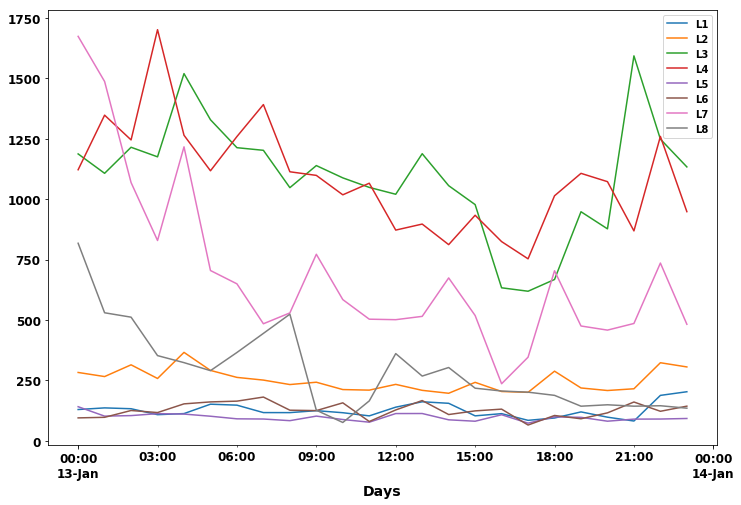

In [71]:
test_range.plot(figsize=(12,8))
#testagg.plot(figsize=(12,8))

In [77]:
df_forecast.columns

Index(['L1_forecast', 'L2_forecast', 'L3_forecast', 'L4_forecast',
       'L5_forecast', 'L6_forecast', 'L7_forecast', 'L8_forecast'],
      dtype='object')

In [78]:
test_range.columns

Index(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8'], dtype='object')

In [83]:
#testagg.columns

In [84]:
#df2 = df_forecast.join(testagg)

In [85]:
df_forecast.head()

,L1_forecast,L2_forecast,L3_forecast,L4_forecast,L5_forecast,L6_forecast,L7_forecast,L8_forecast
2019-01-13,164.413619,383.733132,1323.539914,1462.763307,110.895917,125.504135,1835.935027,817.139928
2019-01-14,169.378076,360.711065,1352.399715,1527.696513,108.242871,130.350634,1753.185366,876.469471
2019-01-15,167.605702,356.661698,1378.715233,1569.774532,105.017232,132.169176,1642.889045,949.489534
2019-01-16,174.116684,351.387196,1397.259050,1570.580575,106.055866,129.692636,1532.095812,948.308484
2019-01-17,175.098403,350.712808,1391.674681,1569.634095,105.338348,131.747525,1445.375624,961.807345


In [86]:
#testagg.head()

In [87]:
#testagg.head()

In [63]:
df10

,L1_forecast,L2_forecast,L3_forecast,L4_forecast,L5_forecast,L6_forecast,L7_forecast,L8_forecast,L1,L2,L3,L4,L5,L6,L7,L8
Days,,,,,,,,,,,,,,,,
2019-01-13,164.413619,383.733132,1323.539914,1462.763307,110.895917,125.504135,1835.935027,817.139928,126.516942,251.450144,1093.452195,1088.16359,96.994663,126.775008,693.320596,291.236877
2019-01-14,169.378076,360.711065,1352.399715,1527.696513,108.242871,130.350634,1753.185366,876.469471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-15,167.605702,356.661698,1378.715233,1569.774532,105.017232,132.169176,1642.889045,949.489534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-16,174.116684,351.387196,1397.259050,1570.580575,106.055866,129.692636,1532.095812,948.308484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-17,175.098403,350.712808,1391.674681,1569.634095,105.338348,131.747525,1445.375624,961.807345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
